# Twitter Analysis

#### Taking 1000 tweets on the word 'data science' and finding positive/negative words in them.
#### Find the most frequent terms to get some insights from these tweets

In [46]:
library("twitteR")
library("tm")
library("stringr")
library("dplyr")
library("ggplot2")
library("SnowballC")
library("qdap")
library("wordcloud")

#### UsingTwitter API keys to import the tweets

In [4]:
consumer_key <- "KKLKmT0d9DTO388hWPPE58AnN"
consumer_secret <- "rwlrmt4UL4f7YZDGNy0x8gkEGet5CPM3k16eHbA5ocSw5r4WRS"
access_token <- "1318438977716711424-8t1j4SpVndcFL1JMVTfIWq3fsezFac"
access_secret <- "GC9GuwYR4YyUT4kADTrqnqHASWzyCpB9zanrSKqahxglU"

In [5]:
setup_twitter_oauth(consumer_key,consumer_secret,access_token,access_secret)

[1] "Using direct authentication"


In [6]:
findfd= "data science"
number= 1000

In [7]:
tweet=searchTwitter(findfd,number,lang="en") ##parsing tweets 

In [8]:
tweetT=lapply(tweet,function(t)t$getText())
head(tweetT,5)

[[1]]
[1] "RT @TaeliMunyuki: 18 Of The Most Recommended Data Science Platforms To Learn Python and SQL https://t.co/Su8rebJScL"

[[2]]
[1] "RT @Udemy_Coupons1: 2021 Data Science &amp; Machine Learning with R | 100%OFF #udemycoupon https://t.co/ImYYUKYRSy\n\n#MachineLearning #BigData #…"

[[3]]
[1] "RT @Udemy_Coupons1: 2021 Data Science &amp; Machine Learning with R | 100%OFF #udemycoupon https://t.co/ImYYUKYRSy\n\n#MachineLearning #BigData #…"

[[4]]
[1] "RT @ashtroid22: Python is kind of like the SPSS of data science. Don’t @ me"

[[5]]
[1] "@anthonyfurey There is a subset of people out there who seek to impose their fears and belief that C19 should be tr… https://t.co/tpkBGJn9SK"

#### Cleaning the tweets by removing punctuation marks, digits and captial letters

In [9]:
tryTolower = function(x)
{
  y = NA
  # tryCatch error
  try_error = tryCatch(tolower(x), error = function(e) e)
  # if not an error
  if (!inherits(try_error, "error"))
    y = tolower(x)
  return(y)
}

In [10]:
clean=function(t){
 t=gsub('[[:punct:]]','',t)
 t=gsub('[[:cntrl:]]','',t) 
 t=gsub('\\d+','',t)
 t=gsub('[[:digit:]]','',t)
 t=gsub('@\\w+','',t)
 t=gsub('http\\w+','',t)
 t=gsub("^\\s+|\\s+$", "", t)
 t=sapply(t,function(x) tryTolower(x))
 t=str_split(t," ")
 t=unlist(t)
 return(t)
}

In [11]:
tweetclean=lapply(tweetT,function(x) clean(x))
head(tweetclean,5)

[[1]]
 [1] "rt"           "taelimunyuki" ""             "of"           "the"         
 [6] "most"         "recommended"  "data"         "science"      "platforms"   
[11] "to"           "learn"        "python"       "and"          "sql"         

[[2]]
 [1] "rt"           "udemycoupons" ""             "data"         "science"     
 [6] "amp"          "machine"      "learning"     "with"         "r"           
[11] ""             "off"          "udemycoupon"  ""             "bigdata"     

[[3]]
 [1] "rt"           "udemycoupons" ""             "data"         "science"     
 [6] "amp"          "machine"      "learning"     "with"         "r"           
[11] ""             "off"          "udemycoupon"  ""             "bigdata"     

[[4]]
 [1] "rt"       "ashtroid" "python"   "is"       "kind"     "of"      
 [7] "like"     "the"      "spss"     "of"       "data"     "science" 
[13] "dont"     ""         "me"      

[[5]]
 [1] "anthonyfurey" "there"        "is"           "a"            "subset"      
 [6] "of"           "people"       "out"          "there"        "who"         
[11] "seek"         "to"           "impose"       "their"        "fears"       
[16] "and"          "belief"       "that"         "c"            "should"      
[21] "be"           "tr"

#### Finding positive words and their score

In [12]:
returnpscore=function(tweet) {
    pos.match=match(tweet,positive.words) #matching words in tweets with positive word corpus
    pos.match=!is.na(pos.match)
    pos.score=sum(pos.match)
    return(pos.score)
}

In [48]:
positive.score=lapply(tweetclean,function(x) returnpscore(x))

In [49]:
pcount=0
for (i in 1:length(positive.score)) {
  pcount=pcount+positive.score[[i]]
}
pcount ##number of positive words

[1] 530

In [50]:
poswords=function(tweets){
    pmatch=match(t,positive.words)
    posw=positive.words[pmatch]
    posw=posw[!is.na(posw)]
    return(posw)
  }

In [51]:
##creating a dataframe of positive words
words=NULL
pdatamart=data.frame(words)

for (t in tweetclean) {
  pdatamart=c(poswords(t),pdatamart)
}
head(pdatamart,10)

[[1]]
[1] "freedom"

[[2]]
[1] "benefit"

[[3]]
[1] "intelligence"

[[4]]
[1] "intelligence"

[[5]]
[1] "benefit"

[[6]]
[1] "benefit"

[[7]]
[1] "important"

[[8]]
[1] "rewarding"

[[9]]
[1] "affordable"

[[10]]
[1] "important"

#### Finding negative words and their score

In [17]:
returnnscore=function(tweet) {
    nos.match=match(tweet,negative.words) #matching words in tweets with negative word corpus
    nos.match=!is.na(nos.match)
    nos.score=sum(nos.match)
    return(nos.score)
}

In [18]:
negative.score=lapply(tweetclean,function(x) returnnscore(x))

In [19]:
ncount=0
for (i in 1:length(negative.score)) {
  ncount=ncount+negative.score[[i]]
}
ncount ##number of negative words

[1] 207

In [20]:
noswords=function(tweets){
    nmatch=match(t,negative.words)
    nosw=negative.words[nmatch]
    nosw=nosw[!is.na(nosw)]
    return(nosw)
  }

In [21]:
##creating a dataframe of negative words
words=NULL
ndatamart=data.frame(words)

for (t in tweetclean) {
  ndatamart=c(noswords(t),ndatamart)
}
head(ndatamart,10)

[[1]]
[1] "bitch"

[[2]]
[1] "fuzzy"

[[3]]
[1] "complex"

[[4]]
[1] "fuzzy"

[[5]]
[1] "complex"

[[6]]
[1] "sadly"

[[7]]
[1] "sadly"

[[8]]
[1] "bad"

[[9]]
[1] "tanks"

[[10]]
[1] "tank"

#### Visualise occurence of Negative and Postive words

In [22]:
pwords=unlist(pdatamart)
nwords=unlist(ndatamart)

In [23]:
dpwords=data.frame(table(pwords))
dnwords=data.frame(table(nwords))

In [24]:
##Collecting positive words having freq more than 7
dpwords=dpwords%>%
  mutate(pwords=as.character(pwords))%>%
  filter(Freq>7) 

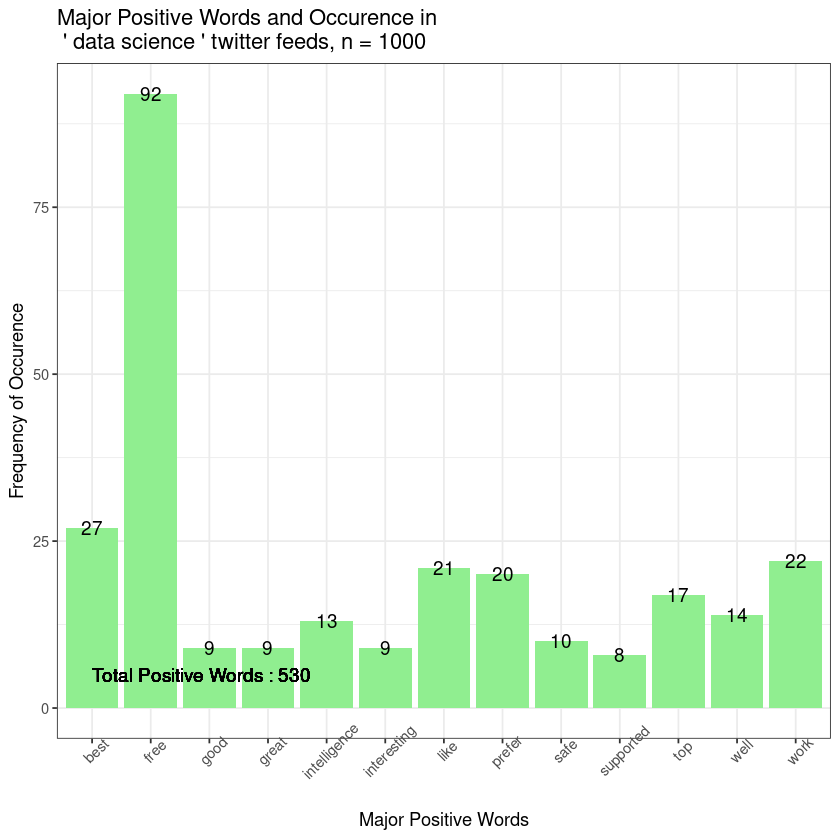

In [25]:
ggplot(dpwords,aes(pwords,Freq))+geom_bar(stat="identity",fill="lightgreen")+theme_bw()+
  geom_text(aes(pwords,Freq,label=Freq),size=4)+
  labs(x="Major Positive Words", y="Frequency of Occurence",title=paste("Major Positive Words and Occurence in \n '",findfd,"' twitter feeds, n =",number))+
  geom_text(aes(1,5,label=paste("Total Positive Words :",pcount)),size=4,hjust=0)+theme(axis.text.x=element_text(angle=45))

In [26]:
##Collecting negative words having freq more than 5
dnwords=dnwords%>%
  mutate(nwords=as.character(nwords))%>%
  filter(Freq>5)

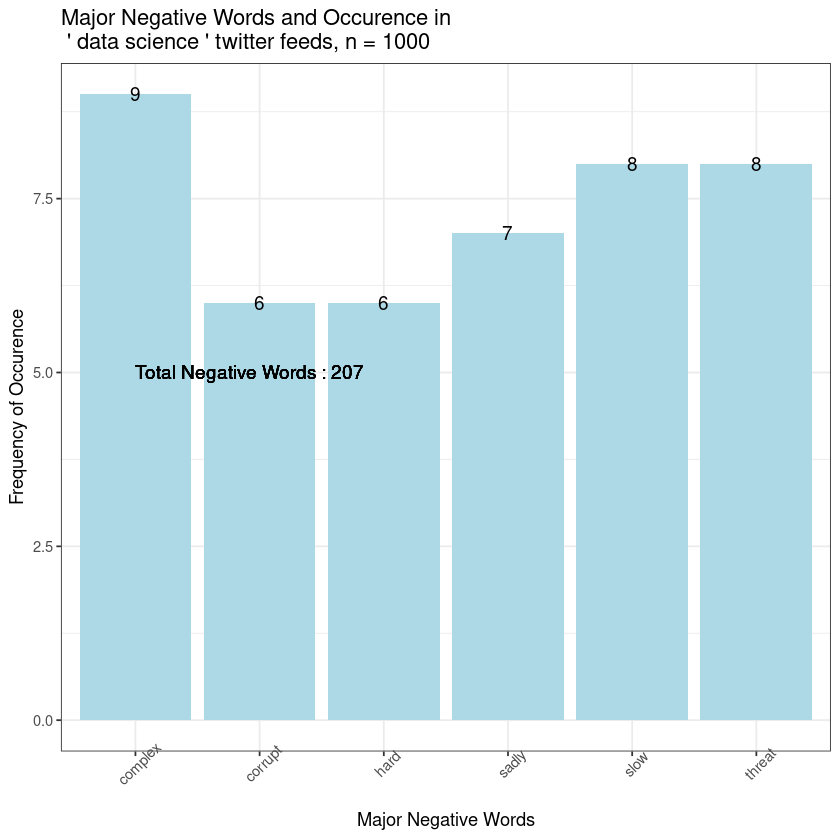

In [52]:
ggplot(dnwords,aes(nwords,Freq))+geom_bar(stat="identity",fill="lightblue")+theme_bw()+
  geom_text(aes(nwords,Freq,label=Freq),size=4)+
  labs(x="Major Negative Words", y="Frequency of Occurence",title=paste("Major Negative Words and Occurence in \n '",findfd,"' twitter feeds, n =",number))+
  geom_text(aes(1,5,label=paste("Total Negative Words :",ncount)),size=4,hjust=0)+theme(axis.text.x=element_text(angle=45))

#### Converting to corpus and removing stop words

In [28]:
tweetscorpus=Corpus(VectorSource(tweetclean))
stopwords_new=c(stopwords("english"),"rt","amp")
tweetscorpus=tm_map(tweetscorpus,removeWords,stopwords_new)
tweetscorpus=tm_map(tweetscorpus,removePunctuation)

Warning message in tm_map.SimpleCorpus(tweetscorpus, removeWords, stopwords_new):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(tweetscorpus, removePunctuation):
“transformation drops documents”


#### Creating a word cloud

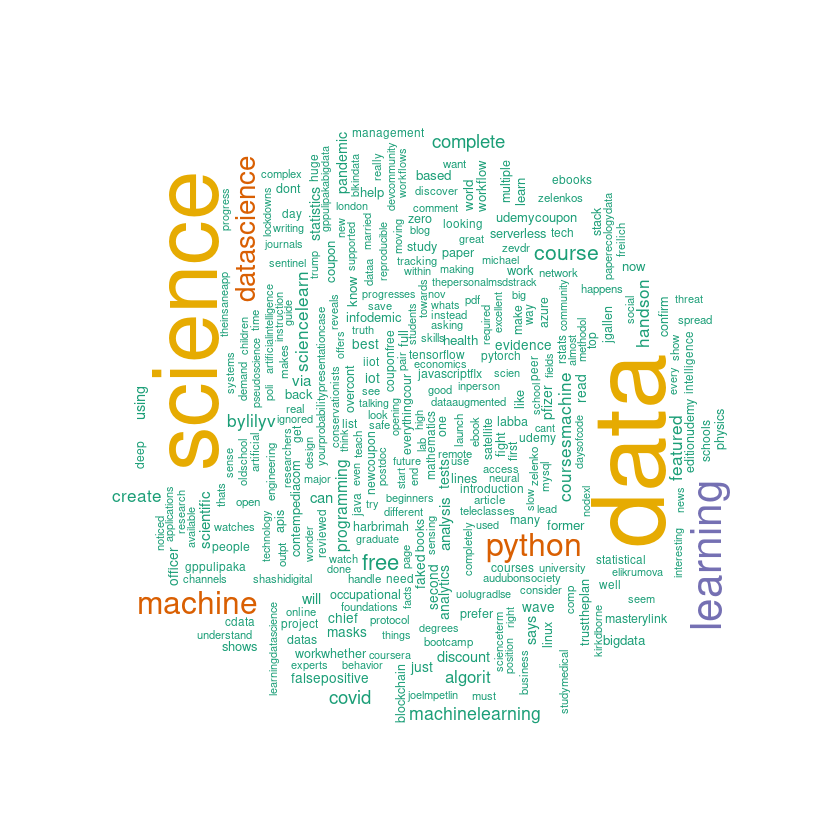

In [41]:
wordcloud(tweetscorpus,scale=c(5,0.5),random.order = TRUE,rot.per = 0.50,use.r.layout = FALSE,colors = brewer.pal(6,"Dark2"),max.words = 300)

#### Term Document Matrix 

In [36]:
dtm=DocumentTermMatrix(tweetscorpus)
##removing sparse terms
dtms=removeSparseTerms(dtm,.99)
freq=sort(colSums(as.matrix(dtm)),decreasing=TRUE)
#get some more frequent terms
findFreqTerms(dtm,lowfreq=30)

[1] "data"            "python"          "science"         "learning"       
 [5] "machine"         "using"           "can"             "course"         
 [9] "analytics"       "datascience"     "free"            "scientific"     
[13] "will"            "analysis"        "via"             "algorit"        
[17] "bylilyv"         "coursesmachine"  "create"          "featured"       
[21] "handson"         "sciencelearn"    "statistics"      "says"           
[25] "pfizer"          "machinelearning" "discount"        "covid"          
[29] "pandemic"        "tests"           "complete"        "programming"    
[33] "read"

#### visualisation of high frequency terms

In [44]:
wf=data.frame(word=names(freq),freq=freq)
wfh=wf%>%
  filter(freq>=40,!word==tolower(findfd))

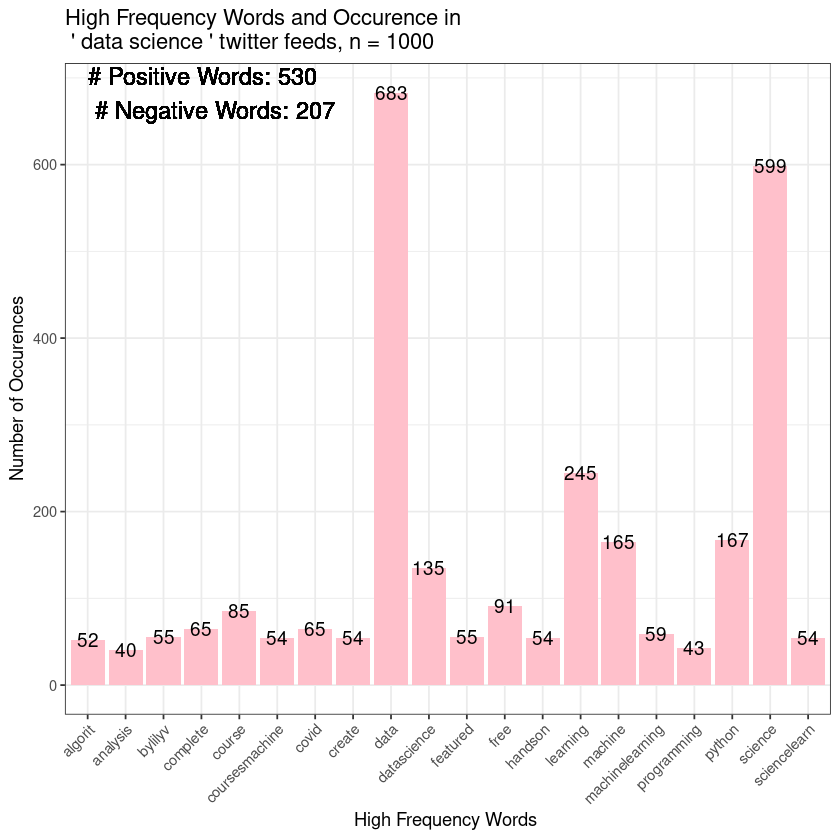

In [45]:
ggplot(wfh,aes(word,freq))+geom_bar(stat="identity",fill='pink')+theme_bw()+
  theme(axis.text.x=element_text(angle=45,hjust=1))+
  geom_text(aes(word,freq,label=freq),size=4)+labs(x="High Frequency Words ",y="Number of Occurences", title=paste("High Frequency Words and Occurence in \n '",findfd,"' twitter feeds, n =",number))+
  geom_text(aes(1,max(freq),label=paste("# Positive Words:",pcount,"\n","# Negative Words:",ncount)),size=5, hjust=0)

Words having high frequency are machine learning,python,programming,learning,covid,analysis.

Thus, we can say that python is the most used language by data scientists and machine learning is important for analysis or predicting for any data. Most of the data science work include machine learning algorithms.

Also, covid has high frequency, which can imply that data science has been used in analysis of covid data or we can say that alot of machine learning models has been used for covid analysis or diagnosis or predicting the increase/decrease in covid cases.